In [53]:
from IPython.display import YouTubeVideo

# Simple Variables

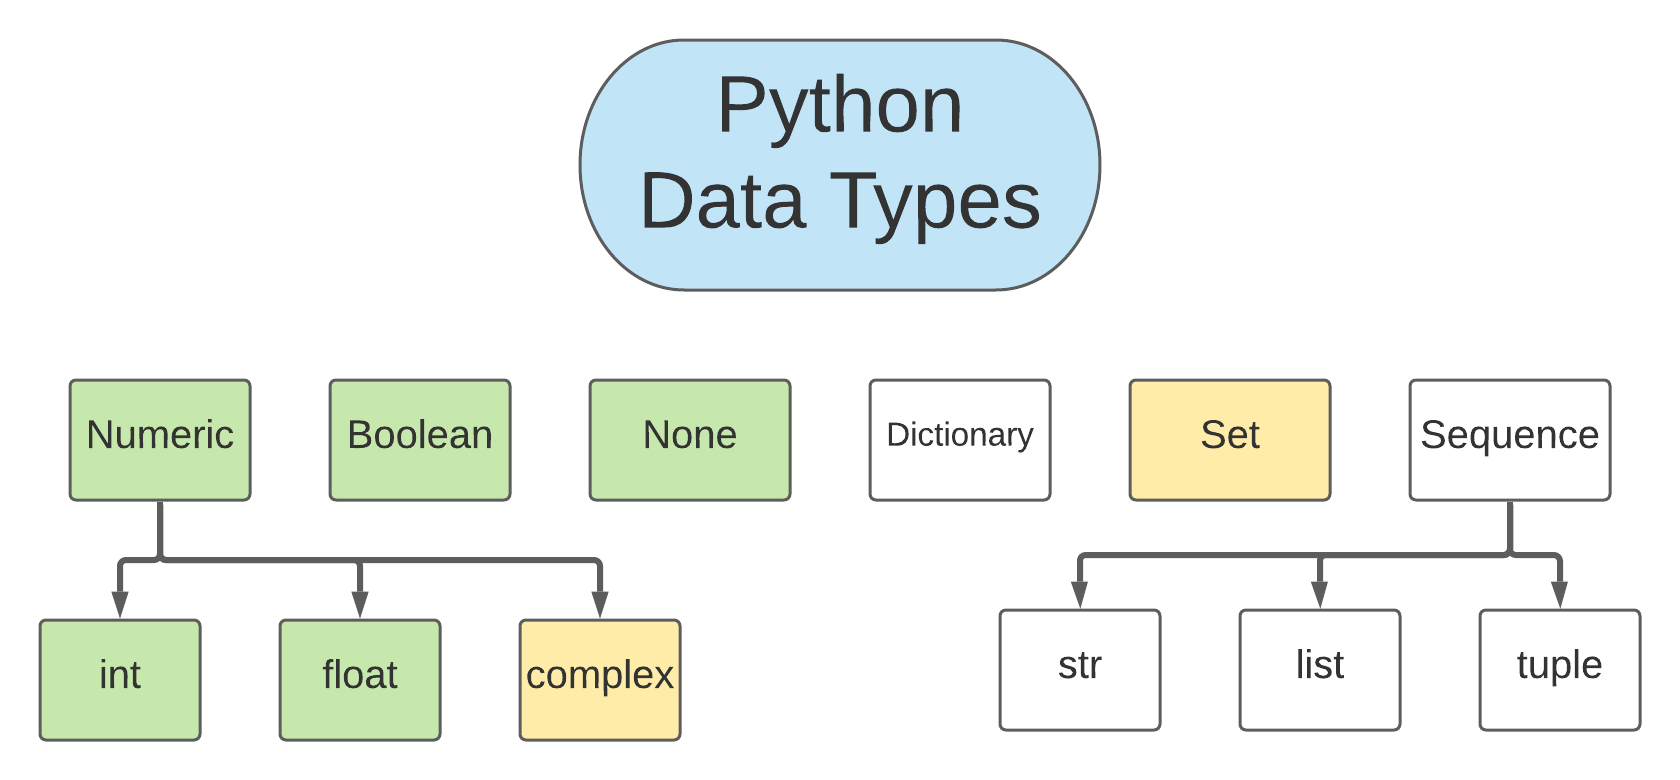

## None

A special object representing Null, nothing, zip, zilch, nada

In [ ]:
foo = None
print(foo)
print(type(foo))

## int 

Whole numbers of any positive or negative value (no longs, shorts, etc)

In [ ]:
elevation = 6443
very_big_number = 30000*30000000000
print(very_big_number)
print(type(very_big_number))

## float

Double-precision floating-point numbers. Range depends on platform and desired precision.

In [ ]:
pi = 3.141529
precise_elevation = 6443.12
print(type(pi))

very_big_float = 3000.7 * 90000000.2
print(very_big_float)

Any operations with both ints and floats automatically promote the into to a float

In [ ]:

a = 10
b = 1.1

c = a * b
print(c)
print(type(c))

We'll come back to floats in a minute...

## bool 

True or False

Note the colors. Capitilization matters here

In [ ]:
result = True
is_summer = False
print(is_summer)

## Floats and Precision

Tom Scott explains it in a British accent:

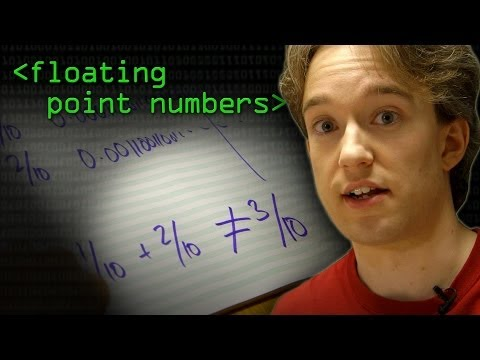

In [52]:
YouTubeVideo("PZRI1IfStY0")

# Sequences and Collections

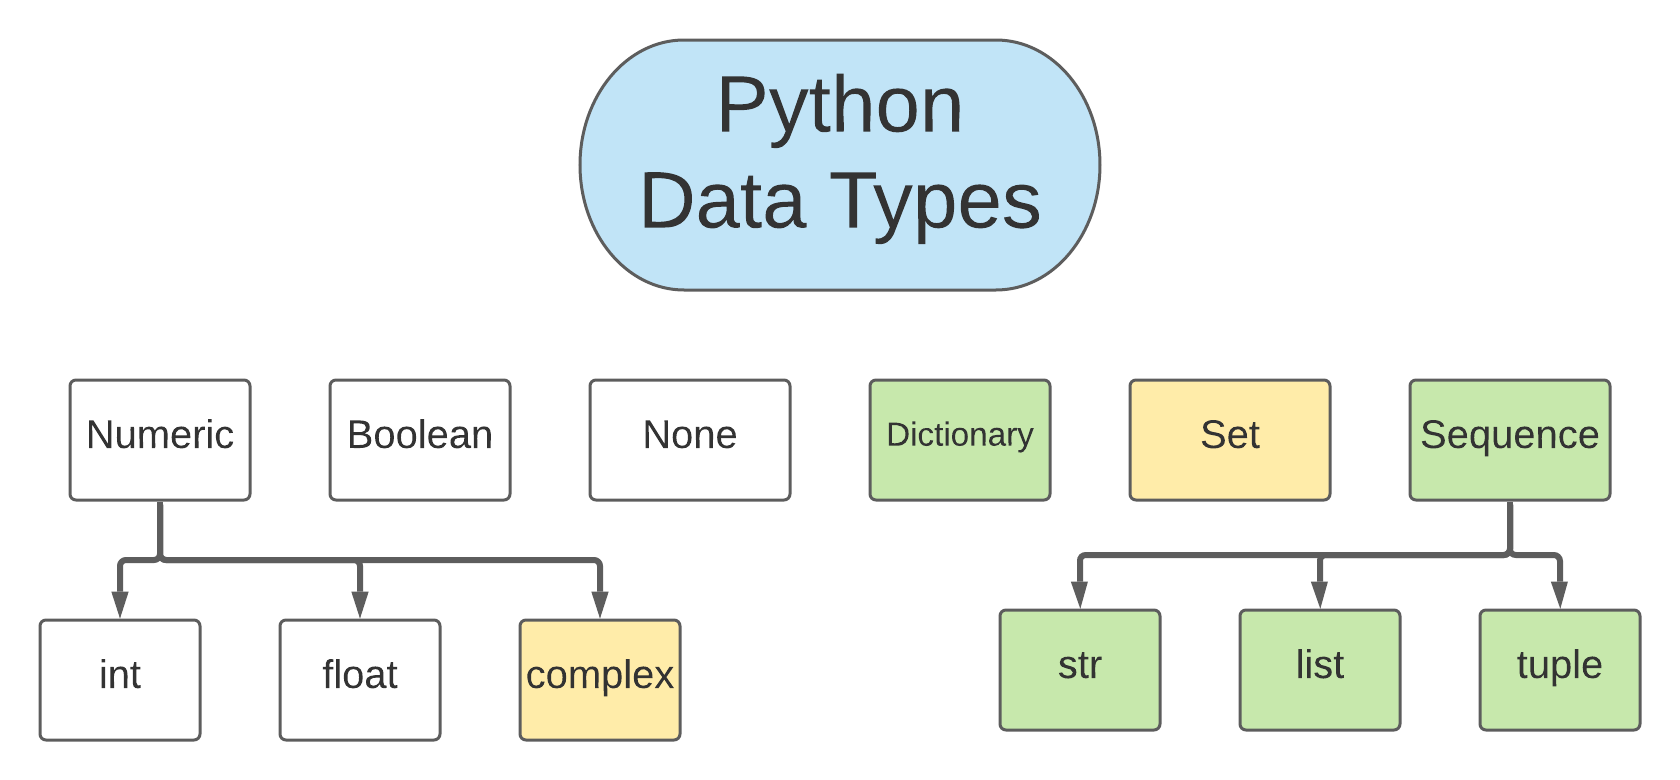

Under the hood, there are a handful of common operations that make an object a "sequence":
* If you can pass it to `len()` and get a value
* If you can access specific elements by index - `names[3]`
* If you can access a subset of elements via slicing - `names[1:5]`
* If you can iterate over each element using the `iterator` interface 

Now's also a good time to talk about `mutability`. 

An object is mutable if it's value can change. So far, everything we've looked at are immutable. When we change the value of an int variable, we're actually pointing to a new object. Some collections are also immutable, while others' mutability are part of their inherent usefulness.

## Strings
A sequence of unicode characters that make up text.

In [ ]:
name = 'Bryce Canyon'

#: Can be defined with either ' or ". Pick one and stick with it, unless the other makes life easier
#location = 'Ruby's Inn
location = 'Ruby\'s Inn'
location = "Ruby's Inn"

More about strings to come later

## Lists
A mutable collection of any other objects. A very common and valuable tool.

In [ ]:
hikes = ['Navajo Loop', 'Inspiration Point']

#: An empty list
to_be_filled = []

#: Lists can contain different types of objects
junk_drawer = [42, 3.14, 'I could never get the hang of Thursdays.']

Like strings, we'll return to lists later

## Dictionaries
A mutable collection of key:value pairs. Keys must be unique within the dictionary and immutable, but values can be anything

In [ ]:
jake = {'Name': 'Jacob Adams', 'Age': 35, 'Hobby': 'Cycling', 'Longest Ride': 197.5}
print(jake)

In [ ]:
#: If you double-assign a key, it will overwrite the previous value
jake = {'Name': 'Jacob Adams', 'Age': 35, 'Hobby': 'Cycling', 'Longest Ride': 197.5, 'Hobby': 'Cartography'}
print(jake)

In [ ]:
#: You can reference values using dict_name[key]
jake['Name']

In [ ]:
#: You can add new keys in the same way
jake['Sanity'] = 'Questionable'

In [ ]:
#: Nested dictionaries to mimic a table
users = {
    'jda': {'Name': 'Jake', 'Work': 'UGRC'},
    'gvr': {'Name': 'Guido', 'Work': 'Microsoft'}
}
print(users['jda']['Name'])
print(users['jda']['Work'])

## Tuples
An immutable collection- a list you can't change

In [ ]:
star_wars_movies = ('Star Wars', 'Empire Strikes Back', 'Return of the Jedi')

In [ ]:
star_wars_movies[2]

In [ ]:
#: But we can't assign
star_wars_movies[0] = 'A New Hope'

One place where you'll use tuples a lot is tuple unpacking. Some functions return multiple objects as a tuple; it helps to unpack them into their own variables.

In [ ]:
four, five, six = star_wars_movies
print(four)
print(five)
print(six)

## Others

There are some other sequences.
* Bytes: Raw binary data, often used for HTTP responses or reading binary files directly
* Sets: Collections that expose set theory/algebra for evaluation and modification

# Iteration, or the Definition of Insanity

# Theory: Everything in Python is an Object

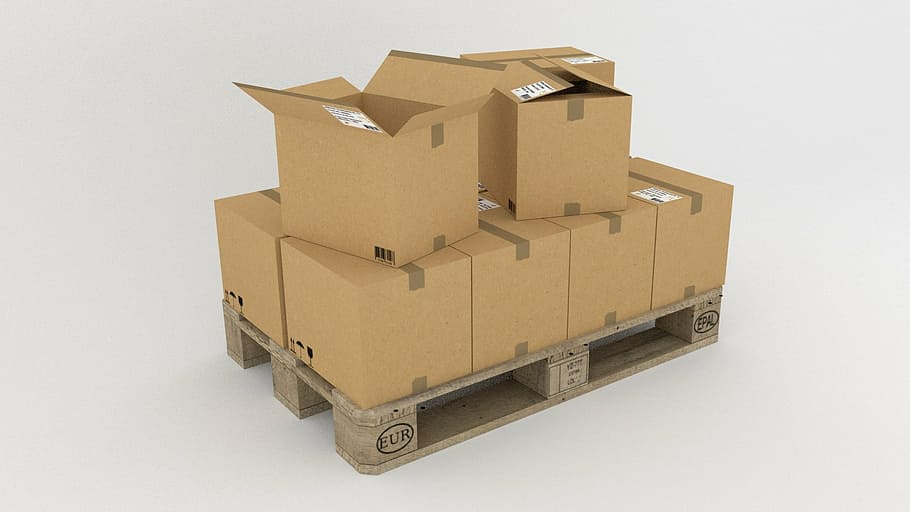

As a reminder, an object is a collection of variables and methods all bound in a common namespace. An object has an _identity_, _type_, and _value_.  

Everything in Python is an object, even simple variables like ints and floats. This introduces some performance overhead, but also lets us do some nifty tricks. 

Because everything is an object, there are going to be methods and special variables available to the programmer. Some of these are defined using leading and trailing double underscores: `__doc__`. We call these "dunders", like "dunder doc." We can see all the different attributes for an object using the `dir()` function.

In [ ]:
numbers = (1, 2)
dir(numbers)

When we type the variable name then dot, `numbers.`, and hit tab, the interpreter uses introspection to list the avaiable normal attributes- in this case, `count` and `index`.

In [ ]:
#numbers.

We've already used another function, `type()` to show the objects type. If you need to check the type of an object in a program, though, it's better to use `isinstance()`

In [ ]:
isinstance(numbers, tuple)

## Identity vs Equality

The first consequence of everything being an object that you'll probably encouter is the difference between two objects having the same identity vs the same value. We can use the `id()` function to get the memory address of an object. If two variables have the same address, they're the same object.

In [ ]:
first = 'Jake'
last = 'Adams'
print(id(first))
print(id(last))

We can check equality, or check if two items have the same value, using `==`. You'll use this a lot in conditionals (more on that later). This expression returns either the Boolean variables `True` or `False`.

In [ ]:
first == last

In [ ]:
first2 = 'Jake'
first == first2

But, what happens if we try to duplicate a variable by assigning a new variable to our exsting variable?

In [ ]:
last2 = last
last2 == last

In [ ]:
print(id(last))
print(id(last2))

"Copying" a variable in this way doesn't actually copy the object's _value_, but rather it's _identity_. `last2` is just another name pointing to the same memory location as `last`. We can check this explicitly using the `is` operator

In [ ]:
last is last2

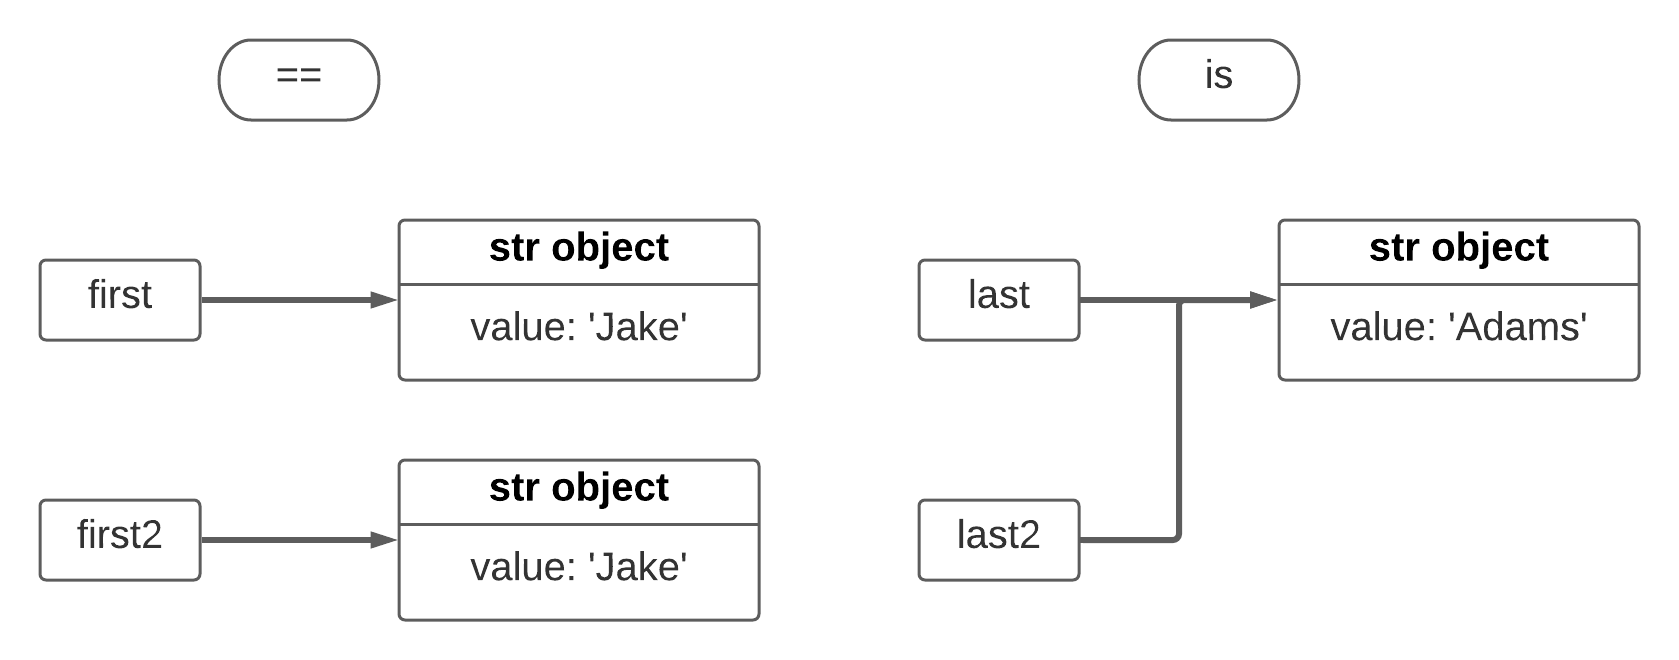

So, we have two separate operators to compare variables (objects):
* `==`: compares _value_
* `is`: compares _identity_

Almost all the time, you'll use `==` to compare objects. The common exception is when you explicitly want to check if something is `None`

In [ ]:
last is None

## More on copying variables, and why lists can give you headaches

So we showed how you can "copy" a variable by assigning another name to an existing variable name. What happens if we change the value of one of them later?

In [ ]:
place = 'Bryce'
place2 = place
print(id(place))
print(id(place2))

In [ ]:
place2 = 'Zion'
print(place)
print(place2)

In [ ]:
print(id(place))
print(id(place2))

So wait, if they point to the same variable, why doesn't updating one update the other? 

Because, strings are _immutable_. When we change the value of a string variable, we're actually creating a new string object and reassigning the name to the new object. The same thing happens with ints, floats, tuples, and any other immutable objects.

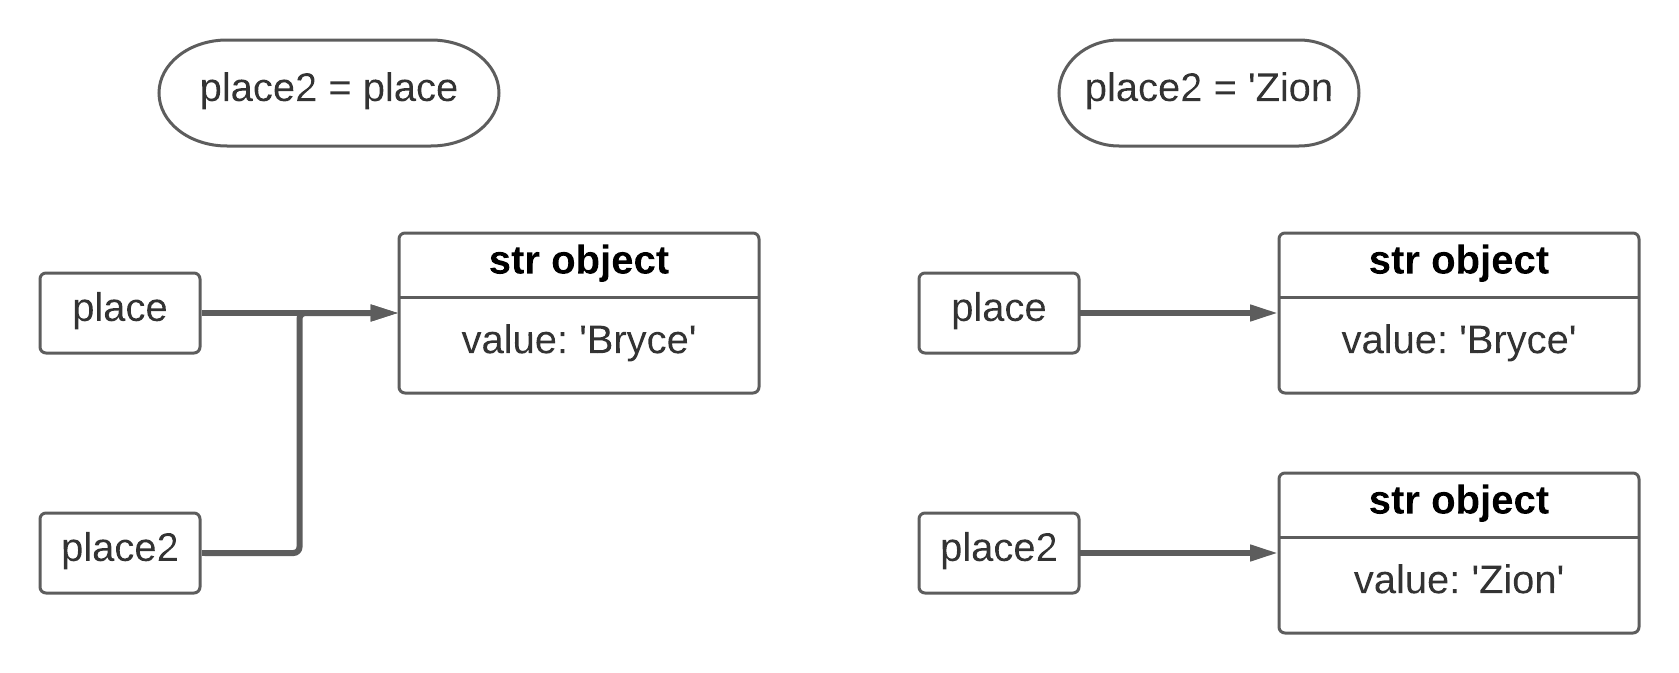

Where this will bite us is for lists, dicts, and any other mutable object. This includes the vast majority of the "non-basic" objects you'll encounter, like objects from arcpy or the ArcGIS API for Python. If you update the object (rather than replace it with a different object), the first one will get updated too.

In [ ]:
names = ['Jake', 'Zach']
names2 = names
print(id(names))
print(id(names2))

In [ ]:
names2.append('Rick')
print(names)
print(id(names))
print(names2)
print(id(names2))

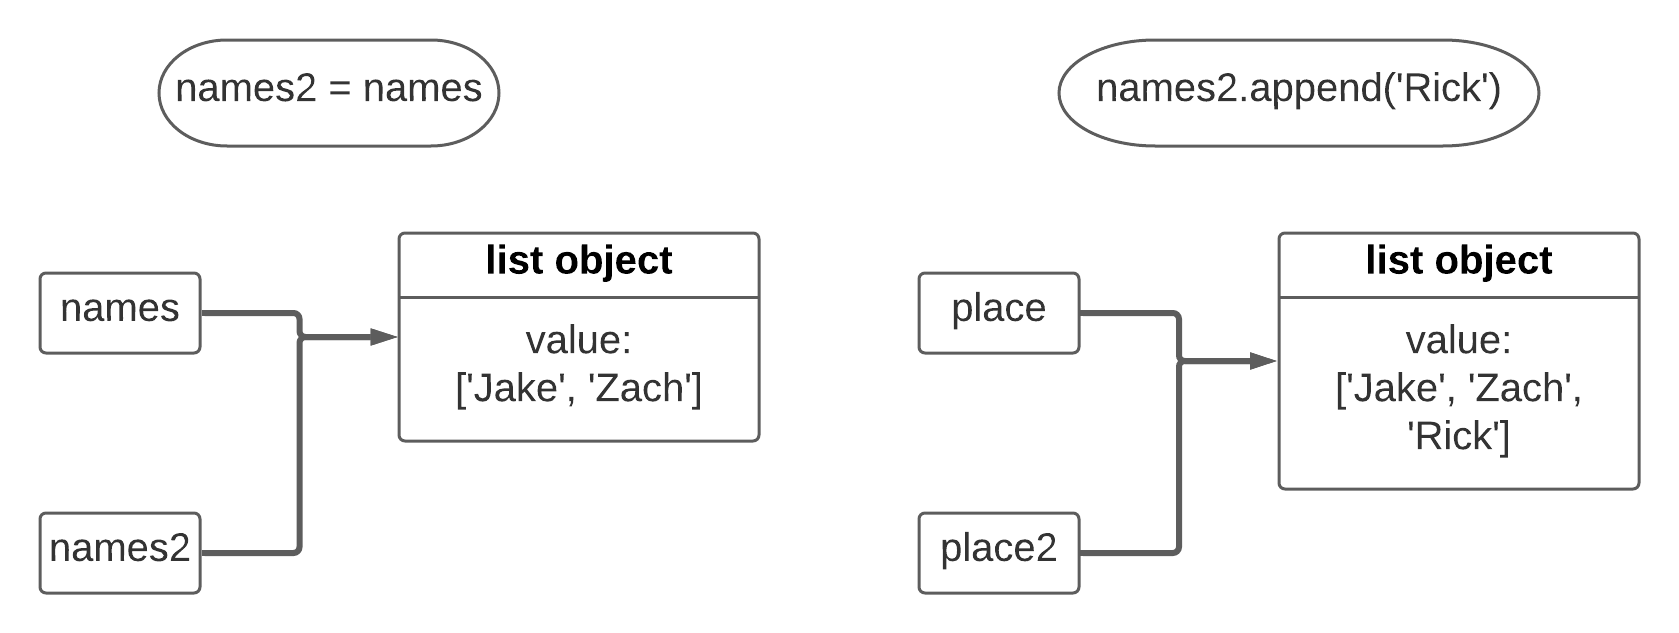

A final peculiarity is that python always passes objects to functions by reference, never by copying the object's value. We'll look at this when we explore functions later. 

# More on Strings

As promised, let's take a look at some of the things you can do with strings and lists. These are some of the most common objects you'll be working with, so it will help to be familiar with everything.

## String Methods

Chances are you're going to be operating on strings a lot. Whether it's splitting alphanumeric parcel ids, or parsing out a section number, or trying to sort out addresses, it all starts with strings.

String objects have [a lot](https://docs.python.org/3.7/library/stdtypes.html#string-methods) of methods available. We'll touch on a few here. 

It's important to remember that strings are immutable. None of these methods change the value of the variable they're called on; they return a new string that you must assign to a variable You can overwrite the existing variable if desired.

In [ ]:
full_name = 'Zion Ponderosa Lodge'

In [ ]:
full_name.upper()

In [ ]:
full_name.casefold()

In [ ]:
parcel_id = '06-019-0009'

In [ ]:
parcel_id.partition('-')

In [ ]:
parcel_id.rpartition('-')

In [ ]:
parcel_id.split('-')

There are several different ways to join strings. The most common is just the `+` operator. If you have a list of strings, you can call `' '.join(list_of_strings)` to join them all using a blank space between them. Note that we're calling it on the character we want to have between the strings, not the list of strings themselves. Python will also implicitly concatenate any strings together that are defined one after the other, but for clarity's sake it's best to use `+` or `.join`.

In [ ]:
name = 'Zion' + 'Ponderosa'
full_name = name + 'Lodge'
print(name)
print(full_name)

In [ ]:
names = ['Zion', 'Ponderosa', 'Lodge']
full_name = ' '.join(names)
print(full_name)

In [ ]:
full_name = 'Zion' 'Ponderosa' 'Lodge'
print(full_name)

## Formatting Strings

You'll also find yourself wanting to insert other variables into the middle of strings, or build strings from multiple variables. Python's format strings, or "f-strings", make this really easy and readable. Start the string with `f'` and then wrap any variable names in `{}`. 

This is especially handy when you want to build the same string for multiple different values, kind of like a code version of the field calculator.

In [ ]:
hike = 'Navajo Loop Trail'
distance = 1.4
elevation = 515

output = f'{hike} is {distance} miles long and has an elevation change of {elevation} feet'
print(output)

You can also specify how numbers in f-strings should be formatted. [This pdf](http://cis.bentley.edu/sandbox/wp-content/uploads/Documentation-on-f-strings.pdf) has a good overview on the options available.

In [ ]:
output2 = f'{hike} is {distance:.0f} miles long and has an elevation change of {elevation:.5f} feet'
print(output2)

## Raw strings: Preserving special characters (and your sanity)

Within strings, some characters have special meanings. We've already seen how to escape an unwanted closing quote mark with `\`. This is also used for some special print control characters, like `\t` for tab and `\n` for newlines. 

In [ ]:
print('This is a string that\'s got both an apostrophe and\na newline')

But what do we do for strings that should contain `\`, like paths in Windows? 

We could escape the escape character with another `\`, but that gets unwieldly quick, especially if you're accessing a network share.

In [ ]:
file_path = 'c:\\temp\\shapefiles\\county.shp'
networked_file_path = '\\\\dept_server\\users\\jschmoe\\shapefiles\\county.shp'
print(file_path)
print(networked_file_path)

Instead, we can use raw strings, which like f-strings start with `r'` and will automatically ignore any special characters like `\`.

In [ ]:
file_path = r'c:\temp\shapefiles\county.shp'
networked_file_path = r'\\dept_server\users\jschmoe\shapefiles\this_would_be_interpreted_as_a_tab.shp'
print(file_path)
print(networked_file_path)

# And More About Lists and Dicts

## Lists and Tuples: Indexing, slicing, and dicing.

As mentioned, one of the things that makes lists and tuples sequences is that they can be indexed and sliced. 

Indexing allows you to use `[]` to refer to the position of the element in the list or tuple you want to access. The tricky thing is that indexes begin at 0, not 1. 

You can also use negative numbers to index from the end of the list. This is handy for getting the last element (or two or three) from a list.

Remember, there are only three difficult problems when programming: choosing variables and off-by-one errors.

In [ ]:
counties = ['Garfield', 'Wayne', 'Kane', 'Iron']
print(counties[2])

In [ ]:
print(counties[4])

In [ ]:
parcel_id = '06-019-0009'
lot = parcel_id.split('-')[-1]
print(lot)

Slicing is similar to indexing but allows you to specify a range of elements: `list[first:last]`. It returns the first element mentioned and everything up to, but not including, the last. In math notation, it's `[first, last)`. If you don't specify first or last, it goes from the start or to the end (respectively)

In [ ]:
numbers = [0, 1, 2, 3, 4, 5]
print(numbers[1:3])
print(numbers[:3])
print(numbers[3:])

While this will probably trip you a couple of times, this example shows how this can be useful. Given index x, `[:x]` and `[x:]` allow you to cleanly split the list at index `x` without having to do any math.

So, if you can omit either the starting or ending slice index, what happens when you leave out both? You get the whole list or tuple. Importantly and interestingly, slicing returns a _shallow copy_ of the list: it creates a new list object and copies the references to the objects in the original list into this new list object.

In [ ]:
numbers2 = numbers[:]
print(id(numbers))
print(id(numbers2))

In [ ]:
numbers.append(6)
print(numbers)
print(numbers2)

The reason this is a _shallow copy_ is that it doesn't copy the list contents' values, just the references. This is fine for immutable objects like ints and strings. However, if we have mutable objects—like a list of dictionaries, a common data structure—any changes to the inner objects will be seen in both lists. This is because they both still point to the same inner objects.

In [ ]:
parks = [
    {'Name': 'Zion', 'State': 'Utah'},
    {'Name': 'Teton', 'State': 'Wyoming'}
]
parks2 = parks[:]
print(id(parks))
print(id(parks2))

In [ ]:
print(id(parks[0]))
print(id(parks2[0]))

In [ ]:
parks2.append({'Name': 'Crater Lake', 'State': 'Orgeon'})
parks2[0]['Name'] = 'Bryce'
print(parks)
print(parks2)

## Adding data to lists: append vs extend

One of the intrinsic values of lists is that we can add and remove elements at will. If we know the index of the desired object, we can use `.pop(index)` to remove it from the list. 

In my epxerience, it's much more common to add items to a list. We've used the `.append()` method a few times already. It just adds the method argument to the end of the list. 

What if we want to join two lists together?

In [ ]:
evens = [2, 4, 6, 8]
odds = [1, 3, 5, 7]
evens.append(odds)
print(evens)

`.append()` just added the entire odds list object to the evens list. What we want is `.extend()`, which will add the _elements_ of the argument (which must be some sort of iterable) to the list.

In [ ]:
evens = [2, 4, 6, 8]
odds = [1, 3, 5, 7]
evens.extend(odds)
print(evens)

## Adding data to dicts: update

As we showed earlier, you can add new keys to a dictionary just by using the new key in the bracket notation.

In [14]:
trails = {'Angels Landing': 'Hard', 'Weeping Rock': 'Easy'}
trails['Emerald Pools'] = 'Moderate'
print(trails)

{'Angels Landing': 'Hard', 'Weeping Rock': 'Easy', 'Emerald Pools': 'Moderate'}


But what if we want to merge two dictionaries? We use the `.update()` method on the target dictionary. This will add all the keys in our other dictionary to the target, and will also overwrite any matching existing keys.

In [15]:
new_trails = {'East Rim': 'Hard', 'Narrows': 'Long', 'Emerald Pools': 'Meh'}
trails.update(new_trails)
print(trails)

{'Angels Landing': 'Hard', 'Weeping Rock': 'Easy', 'Emerald Pools': 'Meh', 'East Rim': 'Hard', 'Narrows': 'Long'}


## .sort() and .reverse() vs sorted()

lists have `.sort()` and `.reverse()` methods that operate in-place- they modify the contents of the original list object. Python also has a built in `sorted()` function (with an optional `reverse` argument). The important distinction is that the list's methods modify the original object, while the built-in `sorted()` returns a new list.

In [ ]:
numbers = [0, 1, 2, 3, 4, 5]
numbers.reverse()
sorted_numbers = sorted(numbers)
print(numbers)
print(sorted_numbers)
print(numbers)

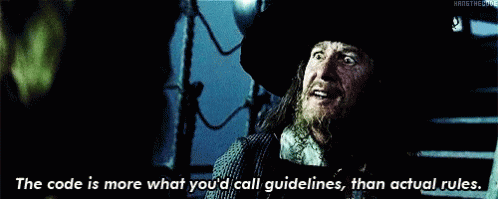

Something you'll come to appreciate after a little bit of practice is that program code is read far more often than it is written. 

You write code once. Then in six months you'll read it again to remember how you solved a particular problem. You'll share your code with a coworker or colleague, who will want to understand and possibly modify it to fit their use case. You'll come back in a year to re-write and extend your code. If you're lucky, you'll get the chance to share your code with someone else in a code review.

Even though it may take a little bit of time at first, properly formatting your code and making it easier to read will save you and everyone else a lot of time and headache later.

Just think, you'll probably be trying to read your code at 4:45 on a Thursday before a long weekend and you've got to make this one change before you leave. Do yourself a favor: make it easy to read from the beginning.

Python style is defined by [PEP (Python Enhancement Proposal) 8](https://www.python.org/dev/peps/pep-0008/), authored by Guido van Rossum and other core Python developers. We'll cover a couple of the core points here.

Some people take a sort of pride in writing code in a unique, personal style. I've heard people claim that it's job security—if they're the only ones who can decipher the code for a critical application, it's harder to fire them. In my experience, clean and well-documented code is an indication that you're a team player and focused on the group's success. This can have a greater positive impact on your career than jealously guarding what you've done.

## Whitespace Matters

If you've done any programming before, you're probably used to using `{}`'s and `;`'s to define blocks of code and ends of lines. Python doesn't use either of those, but rather uses whitespace and indentation level to structure the code. 

The accepted standard is to use four spaces to indent code and define a new block (the contents of function or class definitions, context managers, try/except clauses, loops—all of which we'll touch on later). This is so common that most text editors and IDEs will have a setting to replace any `tab` keypresses with four spaces instead.

In [ ]:
def my_function():
    a = 'foo'
    b = 'bar'
    for i in range(5):
        print(f'{a}: {i}')
    return(' '.join(a, b))

A blank line can be used (sparingly) to separate chunks of code into logical groupings. However, a lot of the time it makes cleaner code to pull these chunks out into their own functions.

In [ ]:
location = 'Bryce Canyon'
event = 'UGIC 2021'
people = ['Sheldon', 'Leonard', 'Amy']

output = []
for person in people:
    output.append(f'{person} was at {event} held at {location}')
    
print(output)


Indentation can also be used to make lists, tuples, and dictionaries easier to read. When you type the opening `[`, `{`, or `(`, python then ignores any whitespace after that, allowing you flexibility in how you define these structres in your code.

In [ ]:
easy_trails = [
    'Sunset to Sunrise',
    'Rim Trail',
    'Bristlecone Loop'
]

moderate_trails = {
    "Queen's Garden": 1.8,
    'Navajo Loop': 1.3,
    'Tower Bridge': 3.0
}

## Coments

Comments begin with a `#` and anything after that is ignored by Python. You can start them at the beginning of the line or at any point in a line (if you want to ignore the rest of the line. For in-line comments, it helps to use two spaces between the end of the evaluated code and the the `#`.

Good comments, like good code, are something of an art form. Comments should tell _why_ you're doing something, not _what_ you're doing or _how_ you're doing it. The goal is that the code itself should tell _what_ and _how_. However, I make a couple of exceptions here:
* Complex or unfamiliar code: When you're starting out, interpreting the code isn't a quick and seamless operation. What is obvious to an experienced programmer may take some time for you and I to understand. You may be trying out certain langauge features for the first time and need to remind youreslf what it's doing.
* Marking sections of code: Like the spacing example above, you can improve readability (or rather comprehensibility) by marking chunks of code with a comment.

In [ ]:
#: Set up needed variables
location = 'Bryce Canyon'
event = 'UGIC 2021'
people = ['Sheldon', 'Leonard', 'Amy']  #: Sorry Raj

#: Build our output strings
output = []
for person in people:
    output.append(f'{person} was at {event} held at {location}')
    
print(output)

In testing and development, you'll often use comments to make notes to yourself or comment out lines of code that don't work or you want to try somethign different. That's perfectly fine, but don't leave them in your production code. 

Once I've got something working, I've rarely gone back and needed the commented-out stuff. Months or years later you won't remember why it's commented out, if its worth keeping or not. It's like those boxes of old 80's style Christmas lights I have in my garage- I like the look, but I've never actually used them. Be better than me- clean out the garage.

## Naming Conventions

Using the same formatting for specific names makes it easy to see at a glance what a particular variable refers to. It also ensures consistency with other programmers:
* Variables, function and method names: `all_lower_case_with_underscores`
* Classes: `CapitalizedWordsWithoutSpaces`
* Constants: `ALL_CAPS_WITH_UNDERSCORES`

Choosing good variable and function names is a difficult but important task. When you're trying to quickly get an idea out of your head and into code before you forget it, it's tempting to use abbreviations and non-sensical variables. Resist this urge. Your brain will thank you later. 

Choosing good variable names goes a long way towards making your code self-documenting. Why double your typing and reading work when you can use descriptive variable names?

In [ ]:
#: Population
x = 15434
#: Area
y = 5.67
#: Population density
z = x/y

In [ ]:
population = 15434
area = 5.67
population_density = population/area

Do as I say, not as I do:
* [some old, comment-riddled code](https://github.com/jacobdadams/rcp/blob/master/methods.py#L100-L150)
* [even more code](https://github.com/jacobdadams/rcp/blob/master/raster_chunk_processing.py)

Loops are the main construct for doing something multiple times. You set up some initial conditions and then repeat the body of the loop until those conditions are met.

Python has two main loops: `for` and `while`. 

## for loops

Python's for loops can be more accurately thought of as "for-each" loops. They iterate through some sort of collection and terminate after the last item. You define a variable that will refer to each element in turn within the body of the loop.

In [ ]:
parks = ['Arches', 'Bryce Canyon', 'Canyonlands', 'Capitol Reef', 'Zion']
for park in parks:
    print(park.upper())

Sometimes you'll want a counter variable (like other languages' `i`) so that you can access other elements in the collection relative to the current item. You can use the `enumerate()` built-in function and tuple unpacking to create a for loop that returns both a counter and the respective element. Be aware, though, that you'll have to do your own bounds checking to make sure you don't try to access an element that doesn't exists!

In [ ]:
numbers = list(range(2,11,2))
for i, number in enumerate(numbers):
    print(f'{number} + {numbers[i+1]} = {number + numbers[i+1]}')

While you can emulate a "traditional" for loop using len() and range(), it's considered unpythonic and you have to handle bounds checking on your own.

In [ ]:
for i in range(0, len(numbers)):
    print(numbers[i])

## Breaking out of loops: break, continue, return

Sometimes you want to interupt a loop before its natural end. There are three statements that you can use:
* `continue`: don't process any more of the current iteration but move on to the next.
* `break`: stop processing this iteration and any that come after it; move to the code after the loop.
* `return`: if you're in a function, you can return early and avoid nested if statements (more on those later)

In [ ]:
for letter in 'python':  #: since strings are sequences, we can iterate over the letters
    if letter == 't':
        continue
    print(letter)

In [ ]:
for letter in 'python':
    if letter == 't':
        break
    print(letter)

## while loops

Python's while loop allows you to do somethign over and over until a certain condition is met. This can be useful for polling user input or retrying an operation until it succeeds.

You can put your condition comparison as part of the `while` statement, or just do `while True` and then use `break` to bail out when your condition is met. 

In [5]:
number = 5
test_number = -1
while test_number != number:
    test_number = int(input('Guess a number between 1 and 5: '))

Guess a number between 1 and 5: 2
Guess a number between 1 and 5: 3
Guess a number between 1 and 5: 5


In [3]:
while True:
    number = 5
    test_number = int(input('Guess a number between 1 and 5: '))
    if test_number == 5:
        break

Guess a number between 1 and 5: 2
Guess a number between 1 and 5: 3
Guess a number between 1 and 5: 5


## Iterating over Dicts

Iterating over a dictionary is slightly different than lists or tuples. You'll need to call the `.items()` method on the dict, which returns a tuple for each key and it's value in the dict. You can then use tuple unpacking to access them by their own variable in a for loop:

In [16]:
trails = {'Angels Landing': 'Beautiful', 'East Rim': 'Crazy'}
for trail, description in trails.items():
    print(f'{trail} is {description}')

Angels Landing is Beautiful
East Rim is Crazy


# Comparisons and Conditions

Another common operation is comparing two values and performing operations based on the result of this comparison. Python provides the standard comparison operators: ==, !=, <, >, <=, >=. 

Under the hood, Python uses the `__equ__`, `__gt__`, `__lt__`, `__ge__`, and `__le__` methods defined on the objects to determine how to make these comparisions. So, if you ever write your own classes, you can add equality checks of your own.

In [ ]:
print(3>4)

In [7]:
evens = [2, 4, 6, 8]
evens2 = [2, 4, 6, 8]
print(evens == evens2)
print(evens is evens2)

True
False


You can add the `not` keyword to negate any boolean value, or any statement that evalutes to a boolean value. 

In [8]:
#: Make sure evens exists and is not a dictionary
print(evens is not None)
print(not isinstance(evens, dict))  #: This is contrived. You'd normally say isinstance(list).

True
True


You can use the logical operators `and` and `or` to chain multiple comparisons together. `and` returns `True` only if both expressions are `True`. `or` returns `True` if at least one is `True`.

In [ ]:
True and True

In [ ]:
True and False

In [ ]:
True or False

In [ ]:
True or True

In [ ]:
if 5 < 3 or 10 > 5:
    print('Hello!')

## if/elif/else

Python uses the `if`, `elif`, and `else` statements to perform logical branching. You'll always start with `if`, but you don't have to have an `else` clause if you don't logically need it. `elif` is a shorthand way of chaining `if`/`else` blocks together (similar to a switch in other languages).

In [ ]:
names = ['Jake', 'Ben', 'Josh', 'Jason']
for name in names:
    if name.startswith('J'):
        print(name)

In [ ]:
counties = [
    {'Name': 'Salt Lake', 'Pop' : 1160437},
    {'Name': 'Utah', 'Pop' : 636235},
    {'Name': 'Davis', 'Pop' : 306479},
    {'Name': 'Cache', 'Pop' : 128289},
]

for county in counties:
    if county['Pop'] > 1000000:
        county_class = 'First'
    elif county['Pop'] > 175000 and county['Pop'] < 1000000:
        county_class = 'Second'
    else:
        county_class = 'Third'
    
    print(f"{county['Name']}: {county_class} class")

We can cheat a little here and collapse these "variable between two values" into a shorter expresssion.

In [ ]:
for county in counties:
    if county['Pop'] > 1000000:
        county_class = 'First'
    elif 1000000 > county['Pop'] > 175000:
        county_class = 'Second'
    else:
        county_class = 'Third'
    
    print(f"{county['Name']}: {county_class} class")

## Truthiness

Python supports the idea of "Truthiness" for a lot of objects to make comparison statements shorter and less verbose. An object is considered "truthy" if it evaluates to `True`, and "falsy" if it evalutes to `False`.  Under the hood, python does [three steps](https://docs.python.org/3/reference/datamodel.html#object.__bool__) to determine how an object evalutes:
1. Use the `__bool__()` method, if defined for the object.
1. If `__bool__()` isn't defined, try `__len()__` and return True if it returns anything greater than 0.
1. Finally, return False.

The following are always "falsy":
* 0 and 0.0 (ints and floats)
* Empty collection- strings `''`, lists `[]`, dicts `{}`, etc
* The None object

We often use this to determine if a list has values before operating on it. For example, let's say we have a search function that returns a list of results. We want to check if there's anything in the list before proceeding:

In [ ]:
search_results_from_function = []
if search_results_from_function:
    for result in search_results_from_function:
        print(result)


Notice how this code gets more and more indented? We can use not to flatten this out:

In [ ]:
if not search_results_from_function:
    print('No results')
for result in search_results_from_function:
    print(result)

We refer to this as flattening out "arrow code". As the levels of indentation get deeper and deeper, it starts to look like an arrow pointing to the right. This code can be difficult to read, debug, and understand. Programmer and blogger Jeff Atwood has [some more tips](https://blog.codinghorror.com/flattening-arrow-code/) on how to avoid this.

And here's some of [my code](https://github.com/agrc/auditor/commit/bd685a1866b21cf9ee36ef06be3fc8115b2c3621) before and after flattening.

# Theory: Style Matters!

# Functions

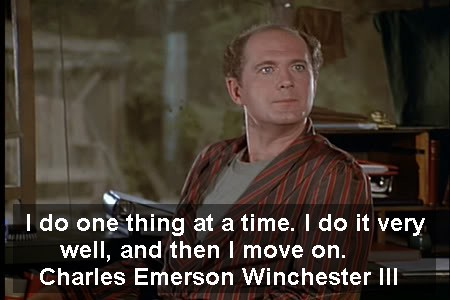

_Functions_ are a self-contained collection of code that operate on values passed into it (its arguments) and returns any resulting data (it's return values).

Functions are an import tool in creating easy to read and easy to modify programs. They are the first step going from a script, a long collection of statements and variables, to an organized and efficient program. 


## It's a Matter of Principle(s)

A common use of functions is to eliminate identical lines of code repeated in several places. By replacing the duplication with a single function definition, you eliminate the risk of forgetting to change all the instances of that code if you need to modify what it does or how it operates. Programmers refer to this as the **DRY principle**: Don't Repeat Yourself. 

Functions should also follow the **Single Responsibility Principle**: they should only tackle one part of the problem and hide as much of the details about how it is solved from the person calling the function. 

By breaking your code up into functions like this, you can make it easy to follow the main, 10,000 foot level idea of what it's doing without getting bogged down in the minutiae of how it's doing it. 

## Defining Our Own Functions

We've already called several built-in functions: `print()`, `type()`, `range()`, `len()`, and so on. Any _arguments_ are passed in the parentheses in the order specified by the function definition (or by keyword, more on that later).

To define our own function, we write `def function_name(argument1, argument2, argument3='foo', argument4='bar'):` and then use indentation to define the function body. We use the `return` statement to hand information back to the calling code. `return` doesn't have to be at the end of the function code; if it makes sense to return in a conditional or a loop, by all means return early. 

For example, this function takes county names in the format `STATE_COUNTYNAME` and returns just `countyname`, lowercased and any spaces or periods removed. It handles a single part of a much larger task and allows the programmer to reuse this logic as often as needed.

In [ ]:
def create_county_key(name, separator):

    cleaned_name = name.split(separator)[-1].casefold().replace(' ', '').replace('.', '')

    if cleaned_name == 'richland':
        cleaned_name = 'rich'

    return cleaned_name

In [ ]:
original_name = 'UT_SALT LAKE CITY'
formatted = create_county_key(original_name, '_')
print(formatted)

## Arguments (not the political kind)

A function defines zero or more arguments that allow you to pass information into the function to operate on. `create_county_key()` has two arguments: `name` and `separator`.

When you call a function, you specify which argument you're passing based on either the position, separated by commas (as in the first example), or by using the argument name and an equals, `arg=`, in the function call. This can help make it clear what the data going into the function will be used for.

In [ ]:
formatted = create_county_key(name=original_name, separator='_')
print(formatted)

When we define functions, we can make some arguments optional by giving them a default value in the function definition. Now, when we call the function we only have to provide the default parameters if they're going to be different.

In [ ]:
def create_county_key(name, separator='_'):

    cleaned_name = name.split(separator)[-1].casefold().replace(' ', '').replace('.', '')

    if cleaned_name == 'richland':
        cleaned_name = 'rich'

    return cleaned_name

In [ ]:
formatted = create_county_key(original_name)
print(formatted)

## Side Effects May Include...

Remembering that everything in Python is an object, `name` does not create a copy of the value of `original_name`. Instead, it passes the reference, or the memory location, of the object to our function. This distinction doesn't matter much for immutable objects like strings, but can bite you with things like lists.

Let's say we want to check a list of county names. If they have a `_` in their name, we'll fix them and reassign their name to the cleaned name.

In [ ]:
def create_county_key_list(names, separator='_'):

    for name in names:
        if '_' in name:
            cleaned_name = name.split(separator)[-1].casefold().replace(' ', '').replace('.', '')

            if cleaned_name == 'richland':
                cleaned_name = 'rich'
            
            names.remove(name)
            names.append(cleaned_name)


In [ ]:
counties = ['cache', 'weber', 'UT_SALT LAKE CITY', 'sanjuan']
create_county_key_list(counties)
print(counties)

While this works, there are two problems:
1. `counties` has now been modified. What if you were relying on the order of that list? Or if there was another part of your code later on that needed the original values?
1. Our function now has two jobs: clean the name and manage the existing list. 

Our function now relies on a _side effect_, rather than returning a value. You should generally avoid side effects because they make it more difficult to quickly read and understand the code, debug the code, or share the code via modules and importing. 

Let's fix our function by returning a new list instead. 

In [ ]:
def create_county_key_list(names, separator='_'):

    cleaned_names = []
    for name in names:
        if '_' in name:
            cleaned_name = name.split(separator)[-1].casefold().replace(' ', '').replace('.', '')

            if cleaned_name == 'richland':
                cleaned_name = 'rich'
                
            cleaned_names.append(cleaned_name)
        else:
            cleaned_names.append(name)

    return cleaned_names

In [ ]:
counties = ['cache', 'weber', 'UT_SALT LAKE CITY', 'sanjuan']
cleaned_counties = create_county_key_list(counties)
print(counties)
print(cleaned_counties)

## Keep it simple, keep it safe

As noted, functions should be relatively small. One developer, [Sandi Metz](https://www.youtube.com/watch?v=npOGOmkxuio), suggests that they should only have five lines of code and no more than 4 arguments. While this makes sense for well-designed object-oriented code, it may be a bit unrealistic starting out.

The main principle goes back to the begining: **do one thing, do it very well, and then move on**.

# Imports: Not just for shipping companies

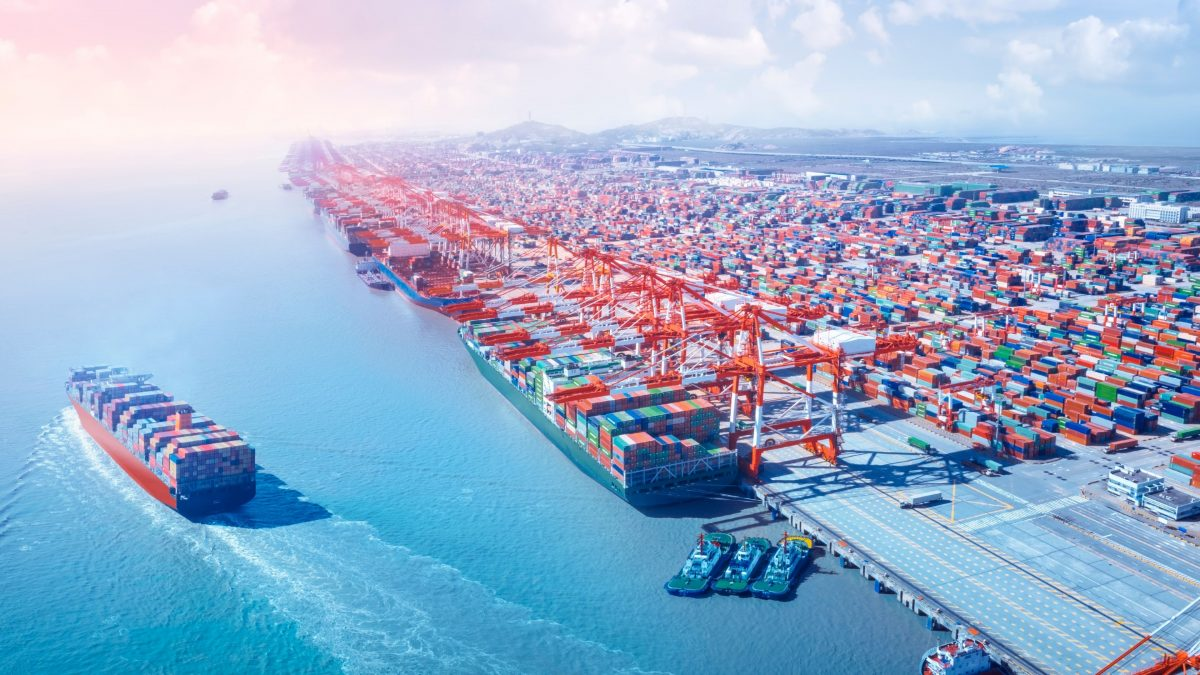

A _module_ is Python's name for a collection of code that can be imported into other programs. A module is defined by a file with the `.py` extension, so your scripts are probably already modules. 

For most everyday purposes, a _package_ is a directory of modules with an additional `__init__.py` file. This is how other libraries, like `arcpy` and `numpy`, provide access to all their code: `package.module.function()`.

## Importing code

Python prides itself on being a "batteries included" langauge. There are a ton of different utilities available in the standard library. There's also a thriving ecosystem of 3rd-party packages on [pypi](http://pypi.org) and [conda](https://docs.conda.io/en/latest/). 

To use any of these libraries, you have to import the relevant modules into your program. Importing copies the specified package, module, or method into the _namespace_ (collection of available variables and functions) of your program. It also runs any executable statements in the module (code that isn't indented).

There are several different ways to import pcakges/modules/functions. We'll use the `os.path.join()` method to demonstrate the different ways to import the `join()` method from the `path` submodule of the standard library `os` module.
* `import os`—load the entire os module. Call join() by `os.path.join()` (and anything else in os, like .
* `import os.path`—just load the path submodule. Call join() by `os.path.join()`.
* `from os.path import join`—only load the join() method. Call by `join()`.
* `from os.path import *`—load every method in the path submodule. Call by `join()`.
* `import os.path as op`—load the path submodule under the name op. Call by `op.join()'.

Practically, there's not a lot of difference between `import os.path` and calling `os.path.join()` or using `from os.path import join` and calling `join()`. The first provides context about which `join()` method you're using (ie, the one from os.path), and the other saves you from the verbosity of typing `os.path` everytime you call the method. 

## Where does python look for modules?

When you try to import a module, Python tries to find it in three places:
1. The input script's directory (`python my_script.py`) or the command prompt's current directory (python command prompt, iPython)
1. The `PYTHONPATH` environment variable.
1. A default location dependent on the python installation.

Fortunately, conda and pip take a lot of the leg work out of worrying about the last two paths. If you're in a conda virtual environment and install a package through conda or pip, you can trust that it will be available to import.

The first search location, the script's directory or the current directory, gives us the ability to divide our program into multiple files (aka modules) and refer to them in a main script/module. It also allows us to import a module when we're working in the interpreter, which is useful for testing and development. 

## `if __name__ == '__main__'`: Writing an importable program

Under the hood, whenever a module is run it creates the `__name__` variable and sets it to the root name of the file—ie, `tools.py` becomes `tools`.

However, if you run a module from the command line (`python my_module.py`), `__name__` is set to main. This allows us to write a script using a bunch of functions that can be imported by another program if desired but can also be run as a stand alone program.

We do this by adding the check `if __name__ == '__main__':` at the end of our file and then writing all our function-calling code in that block.

This is a very common pattern that you'll probably see in the wild.

Let's take our create_county_key method and save it in a module called `utilities.py` in the event directory. Now we can import the module into our Jupyter Notebook session and call the function from that file:

In [ ]:
import utilities
utilities.create_county_key('UT_SALTLAKECOUNTY')

Next, let's add the following lines at the end of `utilities.py`:

In [ ]:
if __name__ == '__main__':
    print('This is from the script!')
    cleaned = create_county_key('UT_CACHE')
    print(cleaned)

Now we can run it from the command line and we should see `This is from the script!` and `cache` printed out. However, if we import the module, it won't run that code because `__name__` will be set to `utilities`. 

What happens if we don't use this check? Let's add a couple lines above the name check and then re-import the code. To do so, we use `importlib.reload()` to replace the cached version of the module that was created when we first imported it.

In [ ]:
import importlib
importlib.reload(utilities)

We'll also run it again from the command line to see that it does both calls.

In [ ]:
%run utilities.py

# Put the REPL Down and Step Away from the Console!

iPython and Jupyter Notebooks are great for testing snippets of code and developing the individual steps of your program, but you'll need to use a text editor or Integrated Development Environment (IDE) to write .py files and really develop programs of meaningful length. 

## Editor bells and whistles

A good editor will offer several features that will make your life as a programmer much easier.
* Syntax highlighting: Just like in these notebooks, a good editor will color your code differently based on its type. Method names are one color, strings another, and ints/floats another still. 
* Code folding: Collapse blocks of code that you're not currently working on.
* Line numbers: Critical for debugging and troubleshooting.
* Interactive code hinting: Auto-complete, IntelliSense, interactive method signatures.
* Built-in debugging: Stepping through your code line by line, allowing you to track values and logic flow.
* Auto formatting: Automatically enforce line length, line separation, and a host of other style conventions.
* Linting and error checking: Warn about poor style choices and potential run-time errors (accessing variables that haven't been defined, missing closing brackets, etc.
* Version control: Built-in support for git (and other VCS) and GitHub.

## Available Editors and IDEs

There are several good editors and IDEs available. Editors usually have limited features compared to IDEs; I'd really recommend going with an IDE.

Editors:
* Notepad++
* Vim/Emacs
* Atom
* Sublime Text

IDEs:
* Idle (comes with python)
* Visual Studio Code (VS Code)
* PyCharm
* Spyder
* Eclipse


## Getting set up in VS Code

VS Code provides a good balance between text editor and full-bore IDE — and it's free! We'll go over how to set it up for a smooth Python experience.

First, `conda install` the following packages into your project's virtual environment to support some of the automated features:
* `pylint`—Linting
* `yapf`—Formatting

Next, open VS Code and install the following extensions from the Marketplace:
* Python—Foundational Python support
* Pylance—The latest "language server", providing better code hinting

The best way to organize your code for working with VS Code is to put it in folders. I start a new git repo for each project, but if you're not ready for git just yet you can just create individual folders or create one main "scripts" folder (or something like that).

Once you've got your folder set up, I generally launch VS Code by right clicking on the folder in Explorer and select "Open with Code", or by right clicking on the taskbar icon and selecting the folder. This allows you to see all the different files in the folder and to store project-specific files (readmes, config files, etc) in a sensible location. 

Now that you've got your folder structure in place, create `setup.cfg` in your program's root directory and paste this in to guide the formatter `yapf` (based on the [Google Python style guide](https://google.github.io/styleguide/pyguide.html#3-python-style-rules)). Note that we use a wider line width than Google; this is one of those "guideline" things.

```
[yapf]
based_on_style=google
ALLOW_SPLIT_BEFORE_DICT_VALUE=False
COLUMN_LIMIT=120
COALESCE_BRACKETS=True
DEDENT_CLOSING_BRACKETS=True
EACH_DICT_ENTRY_ON_SEPARATE_LINE=True
INDENT_DICTIONARY_VALUE=False
SPLIT_BEFORE_DOT=True
```

We'll also add `pylintrc` to this folder with the following contents:

```
[MASTER]
load-plugins=pylint_quotes
max-line-length=120
disable=bad-continuation,broad-except
ignore-patterns=test_.*?py
ignore=secrets.py,example.py
generated-members=arcpy.da.SearchCursor,arcpy.da.UpdateCursor,arcpy.da.Describe,arcpy.env.scratchFolder,arcpy.env.scratchGDB
```

Now we'll change our preferences in VS Code to use all these different tools. 

In VS Code, open the preferences by hitting `ctrl-shift-p` (which brings up the command window) and typing `preferences`, or going to File > Preferences > Settings.
* Search for `pylint` and scroll until you see "Python > Linting: Pylint Enabled" and check the box to allow pylint to check your code for style and other formatting errors.
* Search for `yapf` and make sure "Python > Formatting: Provider" is set to "yapf"
* Search for `column` and set both "Editor > Minimap: Max Column" and "Editor: Word Wrap Column" are set to 120 (or whatever the `COLUMN_LIMIT` is set to in `setup.cfg`)
* Search for `wrap` and set "Editor: Word Wrap" to "wordWrapColumn"

Every time you save, `yapf` will format your code. This may break some of your custom code formatting, and that may drive you up the wall. My personal experience is that once you let go of your custom formatting and accept the common style, you'll soon not even notice. In addition, your code will be easier to read by a much wider audience. 

Whenever you open a new folder, you'll need to select the conda environment you want to be working in. This controls both what installed packages are available for code hinting (like `arcpy` or `pandas`) and what editor tools (`yapf` and `pylint`) are available for VS Code to use while editing. 

If you want to change this later, you can click on the text listing the current environment in the status bar at the bottom to bring up the Select Interpreter dialog.

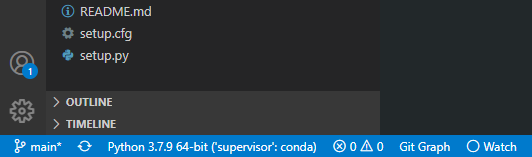

# Working With Files and CSVs

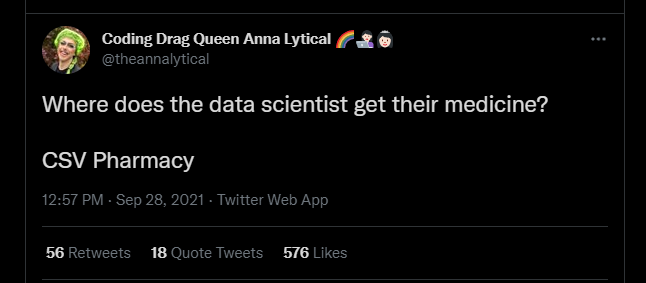

Working with text files in general and CSVs in particular is a very common operation. Python provides tools for reading and writing them row-by-row in to or out of the data structure of your choice. Pandas provides a whole world of table-based data operations but deserves a session all to its own.

## Context matters: reading and writing text files

We use the built-in `open()` function as a _context manager_ to work with files. `open()` takes a "path-like" argument for the file location and an additional code for what mode the file should be opened in—read, write, or append. 

First, let's use mode `'r'` to read a csv into a list of it's lines.

In [6]:
with open(r'.\turbid_315_15_250.csv', 'r') as infile:
    lines = infile.readlines()
print(lines[:10])

['azimuth,altitude,weight\n', '315,2,0.00339834\n', '305,2,0.00277995\n', '324,2,0.0022009\n', '313,8,0.00351878\n', '320,7,0.00274917\n', '310,1,0.0021953\n', '309,5,0.00281953\n', '320,2,0.0034532\n', '312,4,0.00195647\n']


Now, we can write that back out to a new file using `'w'`.

In [2]:
with open(r'.\new.csv', 'w', encoding='utf-8') as outfile:
    for line in lines:
        outfile.write(line)

If we run that last cell again, we see that it just overwrites the existing file. If we wanted to append, we'd instead use mode `'a'`.

We're introducing a new concept here: _context managers_. A context manager is used when you are performing an operation that requires certain set-up and take-down procedures and needs to guarantee they'll be done even if the main action throws an exception. They're basically a short cut for some tedious error handling.

To use a context manager, we use `with` followed by a method that returns an object that supports the context manager dunder methods (like `open()`) and give it a name with `as` to access it later on.

The non-context manager version of working with a file requires three steps:
1. Open the file.
1. Read or write the file.
1. Close the file.

If there is an error reading/writing the file and you don't close it, the operating system won't know what to do with it and it could become corrupt or unreadable. The context manager ensures that happens.

You'll also see context managers used for arcpy's cursors that provide access to feature class attribute tables.

## Binary vs text, and going down the text encoding rabbit hole

On your hard drive, all files are binary: a pattern of 0s and 1s. Different patterns (or _encodings_) are assigned different file types—one pattern may be a shapefile's `.shp` file, another a TIFF file. When you're working with these files, you have to write (or import) a file reader that knows that pattern and loads the data appropriately.

The `open()` method provides the mode `'b'` to open a file in binary mode. Every time you call `read()`, it reads a certain number of bytes from the file and moves the read point ahead, kind of like a tape player.

Plain-text files are so ubiquitous that several common encodings have been defined to read and write text data. Python wraps all this up in the special text mode `'t'` (which is the default for that argument, which is why we could leave it out altogether earlier). By using text mode, Python knows to interpret that sequence of bytes as a string.

Generally speaking,* in the English-speaking realm letting Python choose a default text encoding won't harm you, and you'll see a lot of examples online that leave off the `encoding=` argument to `open()`. However, it's safeest to always specify `encoding=utf-8` when writing out files, especially if they contain any special (non a-z, A-Z, 0-9, standard punctuation) characters.

>\* Like any good asterisk, this hides quite the iceberg of technical trickery. See [The Absolute Minimum Every Software Developer Absolutely, Positively Must Know About Unicode and Character Sets (No Excuses!)](https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/) by one of the founders of Stack Exchange. 
>
> Or, watch the Computerphile video below

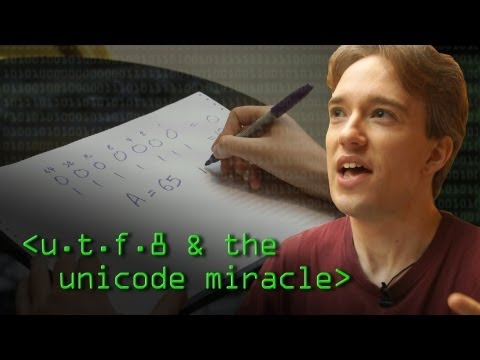

In [54]:
YouTubeVideo("MijmeoH9LT4")

If you get gibberish when reading a file, you may need to specify different encodings in your `open()` method. Start with `utf-8`, and then [explore](https://docs.python.org/3/library/codecs.html#standard-encodings) from there.

## Other modes

In summary, here are all the modes. You combine the encoding mode, `t` or `b`, into one string with the oepn mode, so to write a text file the mode is `tw`.
* `r`: read an existing file
* `w`: write a new file, overwriting an existing file
* `a`: append to the end of an existing file
* `x`: write, but fail if the file already exists

## CSVs: Because plaintext is boring

If we wanted to get the individual values in the list we read in from our example file, we could split each line in the list on `','` and then remove the `\n` at the end of the line. However, Python's built in `csv` module does all this heavy lifting for us, making it easy to read and write CSVs.

To do this, we first have to import the `csv` module. We then `open()` the file like before, but then we create a `csv.reader` or `csv.writer` object from our file object and use that to read/write. The `reader` returns a list of strings for each row in the file, and the `writer` allows you to write a collection to each row.

In [9]:
import csv, pprint
with open(r'.\turbid_315_15_250.csv', 'r') as infile:
    csv_lines = []
    reader = csv.reader(infile)
    for row in reader:
        csv_lines.append(row)
pprint.pprint(csv_lines[:10])

[['azimuth', 'altitude', 'weight'],
 ['315', '2', '0.00339834'],
 ['305', '2', '0.00277995'],
 ['324', '2', '0.0022009'],
 ['313', '8', '0.00351878'],
 ['320', '7', '0.00274917'],
 ['310', '1', '0.0021953'],
 ['309', '5', '0.00281953'],
 ['320', '2', '0.0034532'],
 ['312', '4', '0.00195647']]


And writing is similar:

In [11]:
import csv, pprint
with open(r'.\csvwriter.csv', 'w', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    for row in csv_lines:
        writer.writerow(row)

What happened? The `csv.writer()` object automatically adds the appropriate newline characters to each line it writes, but then the `open()` file object adds its own new newline characters. So, when we `open()` the file, we need to tell it not to add these extra characters:

In [12]:
with open(r'.\csvwriter.csv', 'w', encoding='utf-8', newline='') as outfile:
    writer = csv.writer(outfile)
    for row in csv_lines:
        writer.writerow(row)

If you want to pull your CSV into a row of dicts based on a header line (or your own specified column names), you can use the `csv.DictReader` and `csv.DictWriter` objects. These actually use OrderedDicts, which work just like dictionaries but guarantee the order of the keys within each dict.

In [13]:
with open(r'.\turbid_315_15_250.csv', 'r') as infile:
    csv_lines = []
    dict_reader = csv.DictReader(infile)
    for row in dict_reader:
        csv_lines.append(row)
pprint.pprint(csv_lines[:10])

[OrderedDict([('azimuth', '315'), ('altitude', '2'), ('weight', '0.00339834')]),
 OrderedDict([('azimuth', '305'), ('altitude', '2'), ('weight', '0.00277995')]),
 OrderedDict([('azimuth', '324'), ('altitude', '2'), ('weight', '0.0022009')]),
 OrderedDict([('azimuth', '313'), ('altitude', '8'), ('weight', '0.00351878')]),
 OrderedDict([('azimuth', '320'), ('altitude', '7'), ('weight', '0.00274917')]),
 OrderedDict([('azimuth', '310'), ('altitude', '1'), ('weight', '0.0021953')]),
 OrderedDict([('azimuth', '309'), ('altitude', '5'), ('weight', '0.00281953')]),
 OrderedDict([('azimuth', '320'), ('altitude', '2'), ('weight', '0.0034532')]),
 OrderedDict([('azimuth', '312'), ('altitude', '4'), ('weight', '0.00195647')]),
 OrderedDict([('azimuth', '316'), ('altitude', '7'), ('weight', '0.00238562')])]


Likewise, a `DictWriter` will write out a dictionary to a CSV row, using the `fieldnames` argument for the header and the order the dict's keys are written:

In [14]:
with open(r'.\dictwriter.csv', 'w', encoding='utf-8', newline='') as outfile:
    fieldnames = ['azimuth', 'altitude', 'weight']
    dict_writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    
    dict_writer.writeheader()
    for row in csv_lines:
        dict_writer.writerow(row)

There are modules for reading in excel data, but saving the desired sheet as a CSV can be easier. 

Pandas also provides methods for reading CSVs and excel files directly to dataframes and can be a quick way to ingest data.

# Paths: Choose Yours Wisely

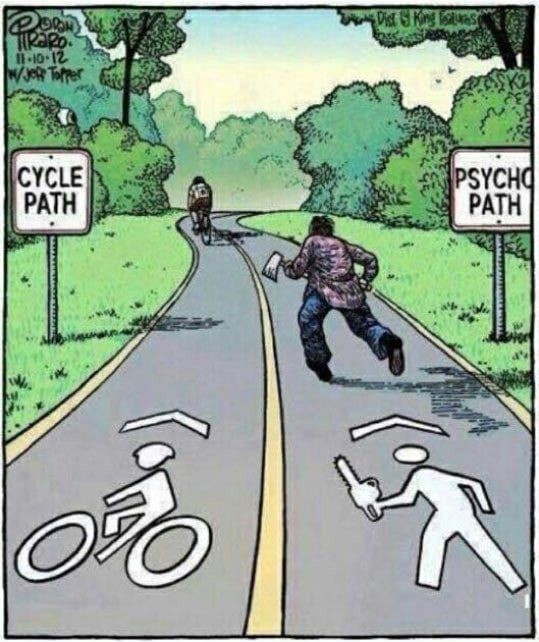

In the file and csv examples, we just used strings to represent the file locations. You'll often need to work with these paths programatically—creating new paths, navigating up or down the directory tree, or seeing if a file already exists.

Python provides two ways for dealing with paths: `os.path` (the old way) and `Path` objects (the new way). 

## `os.path`: Working with paths as strings

One of the most useful parts of using [`os.path`](https://docs.python.org/3.7/library/os.path.html) to work with paths as strings is joining path parts without having to worry about using the right separator. This is especially important if you're writing a script that needs to work on both Windows and Linux/Mac, which use different characters (`\` on Windows, `/` on \*nix) 

In [16]:
import os.path

#: Assume we got this path from somewhere else in our program, like a dialog box
working_directory = r'c:\temp\demo'
output_file = os.path.join(working_directory, 'test.csv')
print(output_file)

c:\temp\demo\test.csv


We can also check to see if a file exists (though in Python, it's generally advised to ask forgiveness than permission):

In [18]:
print(os.path.exists(output_file))
print(os.path.exists(working_directory))

False
False


And we get the file/directory and parents of a path:

In [21]:
dirname, filename = os.path.split(output_file)
print(dirname)
print(filename)

c:\temp\demo
test.csv


In [22]:
print(os.path.dirname(output_file))
print(os.path.basename(output_file))

c:\temp\demo
test.csv


In [23]:
print(os.path.dirname(r'c:\temp\demo'))
print(os.path.basename(r'c:\temp\demo'))

c:\temp
demo


## `Path` Objects

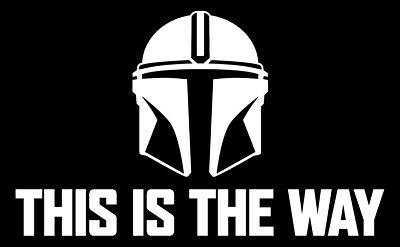

The `Path` objects provide a more comprehensive and easier to use way of handling paths. You create a `Path` object from a string like before. You can then access attributes of the object itself. and call a host of methods on it.

In [25]:
from pathlib import Path
working_dir = Path(r'c:\temp\demo')
#: Join paths with a simple /
output_file = working_dir / 'test.csv'
print(working_dir)
print(output_file)
print(type(working_dir))
print(type(output_file))

c:\temp\demo
c:\temp\demo\test.csv
<class 'pathlib.WindowsPath'>
<class 'pathlib.WindowsPath'>


Under the hood, print first calls the `str()` method on its argument to get the string representation. `str()` in turn calls the dunder `__str__()` or `__repr()__` methods of the argument. Thus, when we print a `Path` object, we get a string representation of its path. When we work with it directly, it's still the object.

What if we want to get the file name (or final directory if it's just a directory)?

In [27]:
print(output_file.name)
print(working_dir.name)

test.csv
demo


Or, if we want to go one folder up, we can use `.parent`

In [28]:
temp_dir = working_dir.parent
print(temp_dir)

c:\temp


If we want to iterate through a directory, we can use `iterdir()`

In [30]:
milld_path = Path(r'c:\temp\elevation\milldsouth')
for path in milld_path.iterdir():
    print(path)

c:\temp\elevation\milldsouth\12TVK4394.tif
c:\temp\elevation\milldsouth\12TVK4395.tif
c:\temp\elevation\milldsouth\12TVK4396.tif
c:\temp\elevation\milldsouth\12TVK4397.tif
c:\temp\elevation\milldsouth\12TVK4398.tif
c:\temp\elevation\milldsouth\12TVK4399.tif
c:\temp\elevation\milldsouth\12TVK4494.tif
c:\temp\elevation\milldsouth\12TVK4495.tif
c:\temp\elevation\milldsouth\12TVK4496.tif
c:\temp\elevation\milldsouth\12TVK4497.tif
c:\temp\elevation\milldsouth\12TVK4498.tif
c:\temp\elevation\milldsouth\12TVK4499.tif
c:\temp\elevation\milldsouth\12TVK4594.tif
c:\temp\elevation\milldsouth\12TVK4595.tif
c:\temp\elevation\milldsouth\12TVK4596.tif
c:\temp\elevation\milldsouth\12TVK4597.tif
c:\temp\elevation\milldsouth\12TVK4598.tif
c:\temp\elevation\milldsouth\12TVK4599.tif
c:\temp\elevation\milldsouth\milld.txt
c:\temp\elevation\milldsouth\milldsouth.vrt
c:\temp\elevation\milldsouth\milldsouth.vrt.ovr
c:\temp\elevation\milldsouth\milldsouth_hs.tif
c:\temp\elevation\milldsouth\milldsouth_hs.tif.a

And we can search for all files of a specific type using `.glob()`:

In [31]:
tifs = milld_path.glob('*.tif')
print(tifs)

<generator object Path.glob at 0x000001FF2E003CC8>


In [38]:
tifs = list(milld_path.glob('*.tif'))
print(tifs[:5])
print(tifs[0])

[WindowsPath('c:/temp/elevation/milldsouth/12TVK4394.tif'), WindowsPath('c:/temp/elevation/milldsouth/12TVK4395.tif'), WindowsPath('c:/temp/elevation/milldsouth/12TVK4396.tif'), WindowsPath('c:/temp/elevation/milldsouth/12TVK4397.tif'), WindowsPath('c:/temp/elevation/milldsouth/12TVK4398.tif')]
c:\temp\elevation\milldsouth\12TVK4394.tif


## ... except when it's not the way

Frustratingly, `arcpy` can not (yet?) handle `Path` objects. However, they are still functionally superior to bare strings and you should still use them in your code. To pass them to `arcpy` methods, call the `str()` method on your object in the `arcpy` method call:
```
arcpy.management.GetCount(str(feature_class_path))
```

## Deleting Directories

There are different methods for deleting directories based on whether it is empty or not. 

If it's empty, you can use `os.rmdir()` on a string or the `.rmdir()` method on a `Path` object.

If it's not empty, and you're 100% sure you want to delete everything and you're 100% you've got the right path (there's no Recycle Bin here!), you can use the `shutil.rmtree()` method from the `shutil` module.

# Introduction: Let's Look Behind the Curtain

Python is a wonderful language that lets you do a lot of cool things, especially in the GIS realm. When combined with libraries like Esri's arcpy you can manage, analyze, and manipulate geospatial data to your heart's content.

## Examples

Programming consists of three main skills:
1. Understanding the syntax of your language of choice
1. Breaking a problem down into individual, workable chunks
1. Finding a way to use the programming language to work on each of those chunks

These skills are not black and white, either you understand it or you don't types of things. Instead, you'll grow in ability with practice and training. They're also very inter-related: as you improve your understanding of the language, you'll see new ways to string the various parts of the solution together, which in turn will help you figure out new ways of breaking the problem down next time.

## Today's goal

Starting out with a little bit of Googling and liberal use of the copy/paste shortcuts, you can put together a program that accomplishes simple tasks. After a while, you'll start to get a sense for how the languge works, but you'll soon discover that things get complicated and difficult to update.

For this class, I want to do more than just teach you the syntax of Python. I want to dig a little deeper and understand how different parts of Python work and why they can help you write better programs. We'll show language features but we'll also dive into a little bit of theory. 

**By the end of the day, our goal is to be able to write a modular, easy to maintain program that can `<perform some action via arcpy>`**

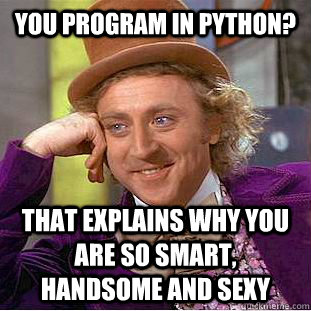

## The Programmer's Mindset

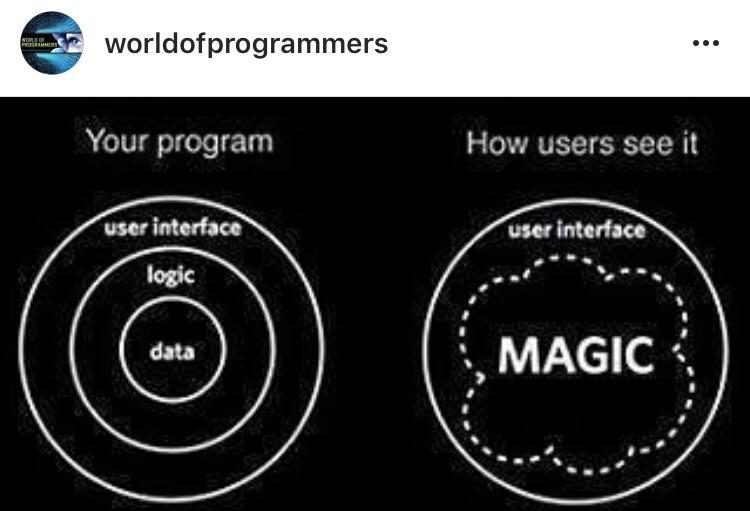

Contrary to popular opinion, programming is NOT magic. Perhaps the most important thing to remember is that everything happens for a reason. If something happens, it's because something that you programmed or that someone else programmed in code you're referencing. 

Early on when you don't understand everything that's going on, it's easy to think it's magic. Take a breath and remember that with enough time you can understand it all. Your task is to figure out if you really need to know why and then start learning about that one thing.

Programming is about **decomposition** (and no, not the rotting apple kind). It's about taking a problem and breaking it down into smaller and smaller steps until the steps line up with Python syntax. As you write more code, some common steps will begin to become second nature, allowing you to solve more and more complex problems.

## Learning Resources

There are lots of good resources for learning how to program in general and Python in specific:

* [docs.python.org](https://docs.python.org/3.7) — Start with the Tutorial, go back to the Library Reference for info about classes and methods, and check out the Language Reference if you want to get really nuts & bolts.
* YouTube — Look around until you find a presenter you can follow along and dig in.
* MIT Open CourseWare — Check out [this course](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/). There are many others on specific computer science topics.
* Esri Training — Search for Python in their [training catalog](https://www.esri.com/training/catalog/search/) 
* Other free online courses
* Other websites — I find msyelf frequently referencing [RealPython](https://realpython.com/) and [GeeksForGeeks](https://www.geeksforgeeks.org/python-programming-language/).
* Pluralsight — Especially the [Core Python series](https://www.pluralsight.com/courses/getting-started-python-core) by Austin Bingham and Rober Smallshire.
* Books — [Python Craftsman trilogy](https://leanpub.com/b/python-craftsman) by Bingham and Smallshire, [The Pragmatic Programmer](https://www.barnesandnoble.com/w/the-pragmatic-programmer-david-thomas/1132520344?ean=9780135957059) by Thomas and Hunt

## Experiment

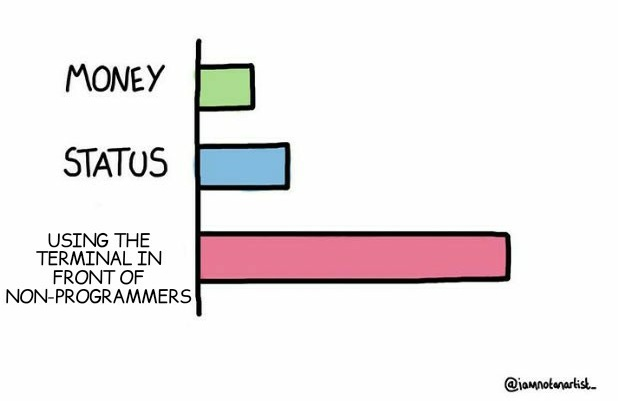

Python's interactive console is a great place to poke around. As you read about something, try it out in the console. If you're trying to remember how something works, test it out in the console. I frequently have an iPython window open when I'm coding to make sure I'm doing something right. 

An interactive console is also a great place to explore what methods are available on objects. Create an object and then type `variable_name.` and press tab. It will give you a list of all the attributes (data specific to the object) and methods (operations that the object can run) available. 